## Modeling Notebook


In this notebook, we're going to apply various machine learning approaches analyze the mouse retinal data

In [10]:
import sklearn as sk
import anndata as ad
import scanpy as sc 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import joblib

os.chdir('/project/hipaa_ycheng11lab/atlas/CAMR2024')
os.makedirs('02_Modeling', exist_ok = True)
sc.settings.n_jobs = -1

In [11]:
adata = ad.read_h5ad('01_QualityControl/1_camr_scrublet_batch_filtered.h5ad')

In [12]:
print(adata)
adata.obs.head()

AnnData object with n_obs × n_vars = 294561 × 32034
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'pANN', 'sampleid', 'subclass_label', 'majorclass', 'author_cell_type', 'age', 'gender', 'reference', 'accession', 'sample_note', 'development_stage_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_type', 'library_platform', 'cell_type_ontology_term_id', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 

,nCount_RNA,nFeature_RNA,percent.mt,pANN,sampleid,subclass_label,majorclass,author_cell_type,age,gender,...,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,leiden_res_0.02,leiden_res_0.50,leiden_res_1.00,leiden_res_2.00
10x3_Ms_WT_P14_AAACCCAAGGGATCTG-1,8090.0,3062.0,9.431397,0.191304,10x3_Ms_WT_P14,NaN,BC,RBC,P14,Male,...,31.965282,41.140732,57.296962,763.0,6.638568,9.460632,0,0,0,0
10x3_Ms_WT_P14_AAACCCACATGGATCT-1,8397.0,3145.0,7.264499,0.217391,10x3_Ms_WT_P14,NaN,BC,RBC,P14,Male,...,31.512253,40.812911,56.724447,610.0,6.415097,7.292289,0,0,0,0
10x3_Ms_WT_P14_AAAGTCCAGCTGAAGC-1,11927.0,3686.0,8.325648,0.200000,10x3_Ms_WT_P14,NaN,BC,RBC,P14,Male,...,33.465097,42.968881,58.359966,993.0,6.901737,8.351556,0,0,0,0
10x3_Ms_WT_P14_AAATGGAGTCACCCTT-1,10331.0,3621.0,6.427258,0.173913,10x3_Ms_WT_P14,NaN,BC,RBC,P14,Male,...,31.726283,40.649300,55.598756,664.0,6.499787,6.454121,0,0,0,0
10x3_Ms_WT_P14_AACACACCAGAACTAA-1,11236.0,3739.0,6.034176,0.165217,10x3_Ms_WT_P14,NaN,BC,RBC,P14,Male,...,30.375457,39.445287,54.882725,678.0,6.520621,6.046553,0,0,0,0


In [13]:
sc.settings.n_jobs

-1

In [14]:
# Only keeping variable genes
adata = adata[:, adata.var.highly_variable]
if not os.path.isfile('02_Modeling/2_camr_modeling_input.h5ad'):
    adata.write('02_Modeling/2_camr_modeling_input.h5ad')

In [15]:
print(adata)

View of AnnData object with n_obs × n_vars = 294561 × 2175
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'pANN', 'sampleid', 'subclass_label', 'majorclass', 'author_cell_type', 'age', 'gender', 'reference', 'accession', 'sample_note', 'development_stage_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_type', 'library_platform', 'cell_type_ontology_term_id', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_count

In [16]:
if False:
    # Calculating Cluster Specific Differentially Expressed Genes
    sc.tl.rank_genes_groups(adata, groupby="leiden_res_0.02", method="wilcoxon")

    sc.pl.rank_genes_groups_dotplot(
        adata, groupby="leiden_res_0.02", standard_scale="var", n_genes=5,
    )

    plt.savefig('02_Modeling/figures/rank_gene_groups_leiden_res_0.02.pdf')
    plt.show()

## Cell Type Classification

In [17]:
analysis_name = 'majorclass'

### Random Forest Classifier

In [18]:
from scipy.sparse import issparse
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import seaborn as sns

In [19]:
# Extract feature matrix (X) and target vector (y)
X = adata.X
y = adata.obs['majorclass']

# Convert sparse matrix to dense for [insert reason]
if issparse(X):
    X = X.toarray()

# Encode the target variable for [insert reason]
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [20]:
# Initialize the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Seems faster training after only keeping highly variable genes
Takes ~5 mins compared to at least 40 without (might be long I stopped the running)
Takes about 30gb memory vs 180gb before

In [21]:
# Validate on the test set
y_pred_rf = rf_classifier.predict(X_test)

# View validation report
validation_report = classification_report(y_test, y_pred_rf, target_names=le.classes_)
print(validation_report)
with open(f"02_Modeling/{analysis_name}/2_rf_{analysis_name}_validation_report.txt", "w") as report_file:
    report_file.write(validation_report)

              precision    recall  f1-score   support

          AC       1.00      1.00      1.00      8191
   Astrocyte       0.95      0.99      0.97       253
          BC       1.00      1.00      1.00     27477
        Cone       1.00      1.00      1.00       923
 Endothelial       1.00      0.99      0.99       235
          HC       1.00      0.67      0.80        21
          MG       1.00      0.98      0.99      1493
   Microglia       1.00      1.00      1.00      1167
    Pericyte       1.00      0.98      0.99        86
         RGC       1.00      1.00      1.00     12234
         RPE       0.98      0.98      0.98        95
         Rod       1.00      1.00      1.00      6738

    accuracy                           1.00     58913
   macro avg       0.99      0.96      0.98     58913
weighted avg       1.00      1.00      1.00     58913



In [22]:
# Save the RandomForest classifier
model_filename = f'02_Modeling/{analysis_name}/2_rf_{analysis_name}_classifier.pkl'
joblib.dump(rf_classifier, model_filename)

# Save the LabelEncoder
le_filename = f'02_Modeling/{analysis_name}/2_le_{analysis_name}.pkl'
joblib.dump(le, le_filename)

['models/2_le_majorclass.pkl']

FileNotFoundError: [Errno 2] No such file or directory: 'figures/2_modeling/random_forest_majorclass_confusion_matrix.png'

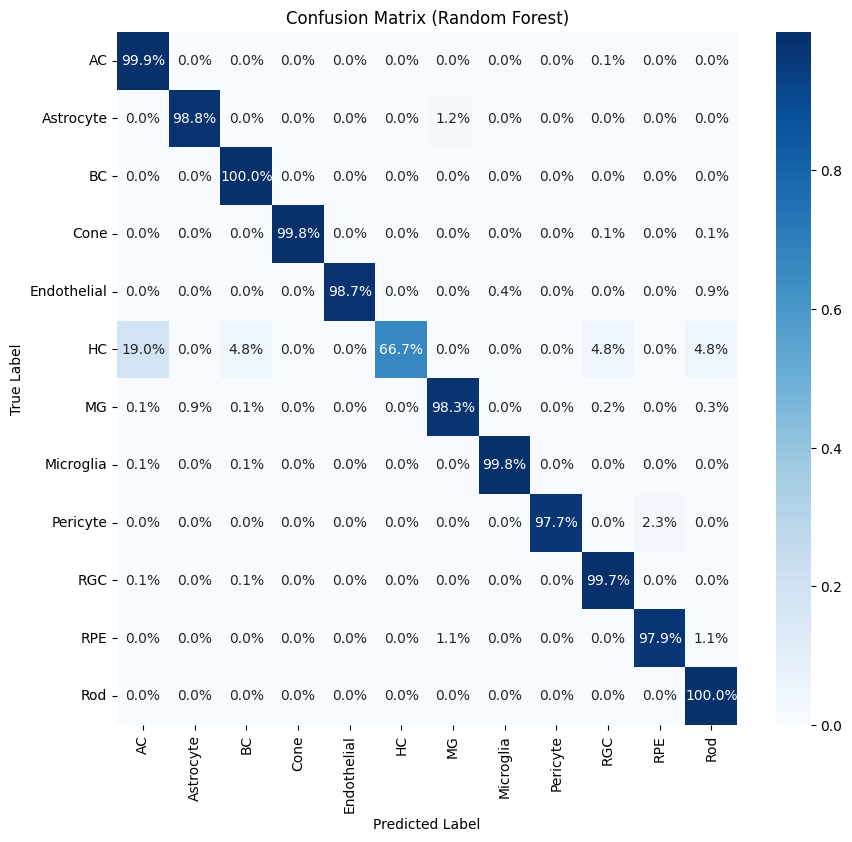

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf, labels=rf_classifier.classes_)

# Make percentage
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 9))
sns.heatmap(cm_normalized, annot=True, fmt='.1%', cmap='Blues', 
            xticklabels=le.inverse_transform(rf_classifier.classes_), 
            yticklabels=le.inverse_transform(rf_classifier.classes_))

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest)')

plt.savefig(f"02_Modeling/random_forest_{analysis_name}_confusion_matrix", bbox_inches='tight')
plt.show()

In [ ]:
adata.obs['majorclass'].value_counts()

In [ ]:
# Get feature importances
feature_importances_rf = rf_classifier.feature_importances_
number_of_features = 20

# Create a DataFrame for better visualization
feature_importance_rf_df = pd.DataFrame({
    'Ensembl': adata.var_names,
    'Marker': adata.var['feature_name'].astype(str),
    'Importance': feature_importances_rf
})

feature_importance_subclass_rf_df = feature_importance_rf_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Plot the top 20 positive important features overall
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Marker', data=feature_importance_rf_df.head(number_of_features))
plt.title(f'Top {number_of_features} Important Features Overall')

plt.savefig(f'02_Modeling/random_forest_top_{number_of_features}_feature_importance.pdf')
plt.show()

In [ ]:
feature_importance_rf_df

In [ ]:
# Plot the distribution of feature importances
plt.figure(figsize=(10, 6))
sns.histplot(feature_importance_rf_df['Importance'], bins=30, kde=True)
plt.title('Distribution of Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Frequency')

plt.savefig('02_Modeling/random_forest_feature_importance_distribution.pdf')
plt.show()

In [ ]:
# Calculate the cumulative sum of importances
feature_importance_rf_df['Cumulative Importance'] = feature_importance_rf_df['Importance'].cumsum()

# Plot the cumulative sum
plt.figure(figsize=(10, 8))
sns.lineplot(data=feature_importance_rf_df, x=feature_importance_rf_df.index, y='Cumulative Importance')
plt.axhline(y=0.9, color='r', linestyle='--')  # Line at 90% cumulative importance
plt.xticks(ticks=range(0, len(feature_importance_rf_df), 500))  # Set x-ticks at increments of 100
plt.xlabel('Feature Rank (sorted by importance)')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Sum of Feature Importances')

plt.savefig('02_Modeling/random_forest_cumulative_feature_importance_distribution.pdf')
plt.show()

In [ ]:
# Not run

# For class-specific analysis, you can inspect trees or use permutation importance
# Using permutation importance from sklearn

from sklearn.inspection import permutation_importance
if False:
    result = permutation_importance(rf_classifier, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

    perm_sorted_idx = result.importances_mean.argsort()

    # Plot permutation importance for the top 20 features
    plt.figure(figsize=(10, 8))
    plt.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=np.array(adata.var_names)[perm_sorted_idx])
    plt.title('Permutation Importance (test set)')
    plt.show()

### One-vs-Rest Logistic Regression
Want to get feature importance per class

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the One-vs-Rest Logistic Regression model
ovr_classifier = LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42)

# Train the classifier
ovr_classifier.fit(X_train, y_train)

In [ ]:
model_filename = f'02_Modeling/{analysis_name}/2_ovr_LogReg_{analysis_name}_classifier.pkl'
joblib.dump(ovr_classifier, model_filename)

In [ ]:
# Validate
y_pred_ovr = ovr_classifier.predict(X_test)

# Print classification report
validation_report = classification_report(y_test, y_pred_ovr, target_names=le.classes_)
print(validation_report)
with open(f"02_Modeling/{analysis_name}/2_{analysis_name}_validation_report.txt", "w") as report_file:
    report_file.write(validation_report)

In [ ]:
# Get class-specific coefficients
class_coefficients = ovr_classifier.coef_
num_classes = len(le.classes_)

# Determine the grid size (e.g., 2 rows, num_classes / 2 columns)
nrows = (num_classes // 2) + (num_classes % 2)
ncols = 2

# Create a figure with subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D

# Plot the most positively important features for each class in a grid
top_features_ovr = pd.DataFrame(columns=['Name', 'Major_Name', 'Ensembl', 'Marker', 'Coefficient'])
for idx, class_name in enumerate(le.classes_):
    coefficients = class_coefficients[idx]
    all_feature_importance_ovr_df = pd.DataFrame({
        'Name': class_name,
        'Major_Name': class_name,
        'Ensembl': adata.var_names,
        'Marker': adata.var['feature_name'].astype(str),  # Ensure feature_name is string
        'Coefficient': coefficients
    })
    feature_importance_ovr_df = all_feature_importance_ovr_df.sort_values(by='Coefficient', ascending=False).head(number_of_features)
    top_features_ovr = pd.concat([top_features_ovr, feature_importance_ovr_df])

    # Plot the top 20 important features for each class
    sns.barplot(ax=axes[idx], x='Coefficient', y='Marker', data=feature_importance_ovr_df)
    axes[idx].set_title(f'Top {number_of_features} Positive Important Features for Class: {class_name}')

# Remove any unused subplots
for ax in axes[num_classes:]:
    ax.remove()

plt.tight_layout()

plt.savefig(f'02_Modeling/ovr_LogReg_{analysis_name}_positive_feature_importance.pdf')
plt.show()

In [ ]:
# Plot negatively correlated features as well
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D

for idx, class_name in enumerate(le.classes_):
    coefficients = class_coefficients[idx]
    all_feature_importance_ovr_df = pd.DataFrame({
        'Name': class_name,
        'Major_Name': class_name,
        'Ensembl': adata.var_names,
        'Marker': adata.var['feature_name'].astype(str),  # Ensure feature_name is string
        'Coefficient': coefficients
    })
    feature_importance_ovr_df = all_feature_importance_ovr_df.sort_values(by='Coefficient', ascending=True).head(number_of_features)
    top_features_ovr = pd.concat([top_features_ovr, feature_importance_ovr_df])
    
    # Plot the top 20 important features for each class
    sns.barplot(ax=axes[idx], x='Coefficient', y='Marker', data=feature_importance_ovr_df)
    axes[idx].set_title(f'Top {number_of_features} Negative Important Features for Class: {class_name}')

# Remove any unused subplots
for ax in axes[num_classes:]:
    ax.remove()

plt.tight_layout()

plt.savefig(f'02_Modeling/ovr_LogReg_{analysis_name}_negative_feature_importance.pdf')
plt.show()

In [ ]:
top_features_df.to_csv(f'02_Modeling/{analysis_name}/2_ovr_LogReg_{analysis_name}_AbsTop{number_of_features}Markers.txt', sep = '\t', index=False)

## Cell Sub-Type Classification

Comparing author_cell_type vs subclass_label. Maybe ask Yuyan what each means

In [ ]:
adata.obs['author_cell_type'].value_counts()

In [ ]:
adata.obs['subclass_label'].value_counts()

In [ ]:
analysis_name = "minorclass"

In [ ]:
minor_to_major_filename = f'02_Modeling/2_minorToMajorClass.txt'
adata.obs[["author_cell_type", "majorclass"]].drop_duplicates().to_csv(minor_to_major_filename, sep = '\t', index = False)
minor_to_major = pd.read_csv(minor_to_major_filename, sep = '\t')

### Random Forest Classifier

In [ ]:
# New target vector
y_subclass = adata.obs['author_cell_type']

# Encode the target variable
le_subclass = LabelEncoder()
y_encoded_subclass = le_subclass.fit_transform(y_subclass)

X_train, X_test, y_train_subclass, y_test_subclass = train_test_split(
    X, y_encoded_subclass, test_size=0.2, random_state=42)

In [ ]:
# Initialize and Train the classifier
rf_classifier_subclass = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_subclass.fit(X_train, y_train_subclass)

In [ ]:
# Validate
y_pred_subclass_rf = rf_classifier_subclass.predict(X_test)

In [ ]:
# Ensure target names match the encoded classes
target_names = le_subclass.inverse_transform(np.unique(y_test_subclass))

# Print classification report
validation_report = classification_report(y_test_subclass, y_pred_subclass_rf, target_names=target_names)
print(validation_report)
with open(f"02_Modeling/{analysis_name}/2_rf_{analysis_name}_validation_report.txt", "w") as report_file:
    report_file.write(validation_report)

In [ ]:
# Save the Model and its LabelEncoder
model_filename = f'02_Modeling/{analysis_name}/2_rf_{analysis_name}_classifier.pkl'
joblib.dump(rf_classifier_subclass, model_filename)

le_filename = f'02_Modeling/{analysis_name}/le_{analysis_name}.pkl'
joblib.dump(le_subclass, le_filename)

In [ ]:
cm = confusion_matrix(y_test, y_pred_subclass_rf, labels=rf_classifier.classes_)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(10, 9))
sns.heatmap(cm_normalized, cmap='Blues', 
            xticklabels=le.inverse_transform(rf_classifier_subclass.classes_), 
            yticklabels=le.inverse_transform(rf_classifier_subclass.classes_))

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Subclass (Random Forest)')

plt.savefig(f"02_Modeling/random_forest_{analysis_name}_confusion_matrix", bbox_inches='tight')
plt.show()

In [ ]:
# Testing model manually

# Define the index of the cell you want to test
cell_index = 1025  # Change this to the desired cell index

# Extract the single cell's features
single_cell = X[cell_index].reshape(1, -1)

# Predict the log-probabilities for the single cell
log_proba = rf_classifier_subclass.predict_log_proba(single_cell)

# Get the top 10 classes with the highest log-probabilities
top_10_indices = np.argsort(log_proba[0])[-10:][::-1]
top_10_log_proba = log_proba[0][top_10_indices]
top_10_classes = le_subclass.inverse_transform(top_10_indices)

# Predict the class for the single cell
predicted_class_encoded = rf_classifier_subclass.predict(single_cell)

# Decode the predicted class
predicted_class = le_subclass.inverse_transform(predicted_class_encoded)

# Get the true class for the single cell
true_class = y_subclass.iloc[cell_index]

# Print the result
print(f'Predicted class for cell index {cell_index}: {predicted_class[0]}')
print(f'True class for cell index {cell_index}: {true_class}')

# Print the top 10 log-probabilities for each class
print(f'Top 10 log-probabilities for cell index {cell_index}:')
for class_name, log_prob in zip(top_10_classes, top_10_log_proba):
    print(f'Class: {class_name}, Log-probability: {log_prob:.4f}')

In [ ]:
from sklearn.tree import _tree, export_text

# Extract the single cell's features
single_cell = X[cell_index].reshape(1, -1)

# Select the most important tree (for example, the first tree)
tree_index = 0  # Change this to select a different tree
tree = rf_classifier_subclass.estimators_[tree_index]

# Get the decision path for the single cell in the selected tree
node_indicator = tree.decision_path(single_cell)
leaf_id = tree.apply(single_cell)

# Extract the feature and threshold information
feature = tree.tree_.feature
threshold = tree.tree_.threshold

# Get the node indices along the decision path
node_index = node_indicator.indices[node_indicator.indptr[0]:node_indicator.indptr[1]]

# Print the decision path
print(f'Decision path for cell index {cell_index} in tree {tree_index}:')
for node_id in node_index:
    if leaf_id[0] == node_id:
        print(f"Node {node_id}: leaf node.")
    else:
        # Get feature name (gene) and threshold
        feature_name = adata.var['feature_name'][feature[node_id]]
        threshold_value = threshold[node_id]
        if single_cell[0, feature[node_id]] <= threshold_value:
            threshold_sign = "<="
        else:
            threshold_sign = ">"
        print(f"Node {node_id}: split on {feature_name} {threshold_sign} {threshold_value:.4f}")

# Optional: Print the text representation of the tree for reference
tree_rules = export_text(tree, feature_names=adata.var['feature_name'])
print(tree_rules)

In [ ]:
# Get feature importances
feature_importances_subclass_rf = rf_classifier_subclass.feature_importances_

# Create a DataFrame for better visualization
feature_importance_subclass_rf_df = pd.DataFrame({
    'Ensembl': adata.var_names,
    'Marker': adata.var['feature_name'].astype(str),  # Ensure feature_name is string
    'Importance': feature_importances_subclass_rf
})

feature_importance_subclass_rf_df = feature_importance_subclass_rf_df.sort_values(
    by='Importance', ascending=False).reset_index(drop=True)

# Plot the top 20 important features overall
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Marker', data=feature_importance_subclass_rf_df.head(number_of_features))
plt.title(f'Top 20 Important Features Random Forest {analysis_name}')

plt.savefig(f'02_Modeling/random_forest_{analysis_name}_top_{number_of_features}_feature_importance')
plt.show()

In [ ]:
feature_importance_subclass_rf_df

In [ ]:
# Plot the distribution of feature importances
plt.figure(figsize=(10, 6))
sns.histplot(feature_importance_subclass_rf_df['Importance'], bins=30, kde=True)
plt.title('Distribution of Feature Importances Random Forest Subclass')
plt.xlabel('Importance')
plt.ylabel('Frequency')

plt.savefig(f'02_Modeling/random_forest_{analysis_name}_feature_importance_distribution.pdf')
plt.show()

In [ ]:
# Calculate the cumulative sum of importances
feature_importance_subclass_rf_df['Cumulative Importance'] = feature_importance_subclass_rf_df['Importance'].cumsum()

# Plot the cumulative sum
plt.figure(figsize=(10, 8))
sns.lineplot(data=feature_importance_subclass_rf_df, x=feature_importance_subclass_rf_df.index, y='Cumulative Importance')
plt.axhline(y=0.9, color='r', linestyle='--')  # Line at 90% cumulative importance
plt.xticks(ticks=range(0, len(feature_importance_subclass_rf_df), 500))  # Set x-ticks at increments of 100
plt.xlabel('Feature Rank (sorted by importance)')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Sum of Feature Importances Subclass')

plt.savefig(f'02_Modeling/random_forest_{analysis_name}_cumulative_feature_importance_distribution.pdf')
plt.show()

### One vs Rest

In [ ]:
# Initialize and Train the One-vs-Rest Logistic Regression model
ovr_classifier_subclass = LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42)
ovr_classifier_subclass.fit(X_train, y_train_subclass)

In [ ]:
# Validate
y_pred_subclass_ovr = ovr_classifier.predict(X_test)

validation_report = classification_report(y_test_subclass, y_pred_subclass_ovr, target_names=le_subclass.classes_)
print(validation_report)
with open(f"02_Modeling/{analysis_name}/2_ovr_LogReg_{analysis_name}_validation_report.txt", "w") as report_file:
    report_file.write(validation_report)

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test_subclass, y_pred_subclass_ovr, labels=ovr_classifier_subclass.classes_)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 9))
sns.heatmap(cm_normalized, annot=True, fmt='.1%', cmap='Blues', 
            xticklabels=le_subclass.inverse_transform(ovr_classifier_subclass.classes_), 
            yticklabels=le_subclass.inverse_transform(ovr_classifier_subclass.classes_))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'{analysis_name}: {100 * cm.diagonal().sum() / cm.sum()}% Accuracy')
plt.savefig(f"02_Modeling/confusion_matrix_{analysis_name}", bbox_inches='tight')
plt.show()

In [ ]:
# Get class-specific coefficients
class_coefficients = ovr_classifier_subclass.coef_
num_classes = len(le_subclass.classes_)

# Determine the grid size (e.g., 2 rows, num_classes / 2 columns)
nrows = (num_classes // 2) + (num_classes % 2)
ncols = 2

# Create a figure with subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D

top_features_subclass = pd.DataFrame(columns=['Name', 'Major_Name', 'Ensembl', 'Marker', 'Coefficient'])
for idx, class_name in enumerate(le.classes_):
    coefficients = class_coefficients[idx]
    all_feature_importance_ovr_df = pd.DataFrame({
        'Name': class_name,
        'Major_Name': minor_to_major.loc[class_name],
        'Ensembl': adata.var_names,
        'Marker': adata.var['feature_name'].astype(str),  # Ensure feature_name is string
        'Coefficient': coefficients
    })
    feature_importance_ovr_df_pos = all_feature_importance_ovr_df.sort_values(by='Coefficient', ascending=False).head(number_of_features)
    feature_importance_ovr_df_neg = all_feature_importance_ovr_df.sort_values(by='Coefficient', ascending=True).head(number_of_features)
    top_features_subclass = pd.concat([top_features_subclass, feature_importance_ovr_df_pos, feature_importance_ovr_df_neg], ignore_index=True)
    
    # Plot the top 20 important features for each class
    sns.barplot(ax=axes[idx], x='Coefficient', y='Marker', data=feature_importance_ovr_df_pos)
    axes[idx].set_title(f'Top {number_of_features} Important Features for Class: {class_name}')

# Remove any unused subplots
for ax in axes[num_classes:]:
    ax.remove()

plt.tight_layout()

plt.savefig(f'02_Modeling/ovr_LogReg_{analysis_name}_positive_feature_importance.pdf')
plt.show()

In [ ]:
top_features_subclass.to_csv(f'02_Modeling/{analysis_name}/2_ovr_LogReg_{analysis_name}_AbsTop{number_of_features}Markers.txt', sep = '\t', index=False)

## Quality of Life

In [ ]:
# Buffer

In [ ]:
# Don't run below unless you want to 

In [ ]:
if False:
    import dill
    # Save the entire session
    filename = '02_Modeling/modeling_notebook_state.pkl'
    with open(filename, 'wb') as f:
        dill.dump_session(f)

In [ ]:
if False:
    import dill
    # Load the saved session
    filename = '02_Modeling/modeling_notebook_state.pkl'
    with open(filename, 'rb') as f:
        dill.load_session(f)